In [1]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
    
red_wine_quality = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
red_wine_quality.head(5)

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
print(f"the red_wine_quality shape is: {red_wine_quality.shape}")
print("")
print(red_wine_quality.head())
print("")
print(red_wine_quality.columns)

the red_wine_quality shape is: (1599, 12)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

In [3]:
x = red_wine_quality["pH"].values
y = red_wine_quality["quality"].values

print("The x variable is:", x)
print("")
print("The y variable is:", y)
print("")
print("The shape of x is:", x.shape)
print("The shape of y is:", y.shape)

The x variable is: [3.51 3.2  3.26 ... 3.42 3.57 3.39]

The y variable is: [5 5 5 ... 6 5 6]

The shape of x is: (1599,)
The shape of y is: (1599,)


In [4]:
print(type(x))
x = x.reshape(-1, 1)
print(x)
print("")
print("the shape of x is:", x.shape)

<class 'numpy.ndarray'>
[[3.51]
 [3.2 ]
 [3.26]
 ...
 [3.42]
 [3.57]
 [3.39]]

the shape of x is: (1599, 1)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print("")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print("")

x_train shape (1119, 1)
y_train shape (1119,)

x_test shape (480, 1)
y_test shape (480,)



In [6]:
print(len(train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)))

4


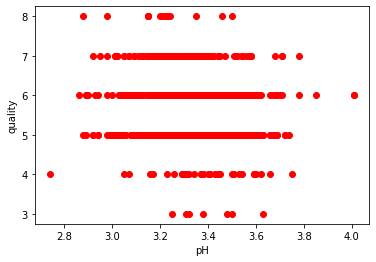

In [7]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel("pH")
plt.ylabel("quality")
plt.show()

In [8]:
# This our instance of a LinearRegression class
lm = LinearRegression()

# Invoke lm.fit(), passing in training data
# This creates the 'best fit line' for our TRAINING data points 
lm.fit(x_train, y_train)


# Then we have a model! We have a formula. We have a line that will predict quality given pH
# Then we test the best fit line, by invoking .predict() on our testing data
# y_predict represents PREDICTIONS from our linear regression!
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.
y_predict = lm.predict(x_test)

print(f"Train Accuracy {lm.score(x_train, y_train)}")
print(f"Test Accuracy {lm.score(x_test, y_test)}")

Train Accuracy 0.0033538148868147433
Test Accuracy 0.0029189144565353597


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

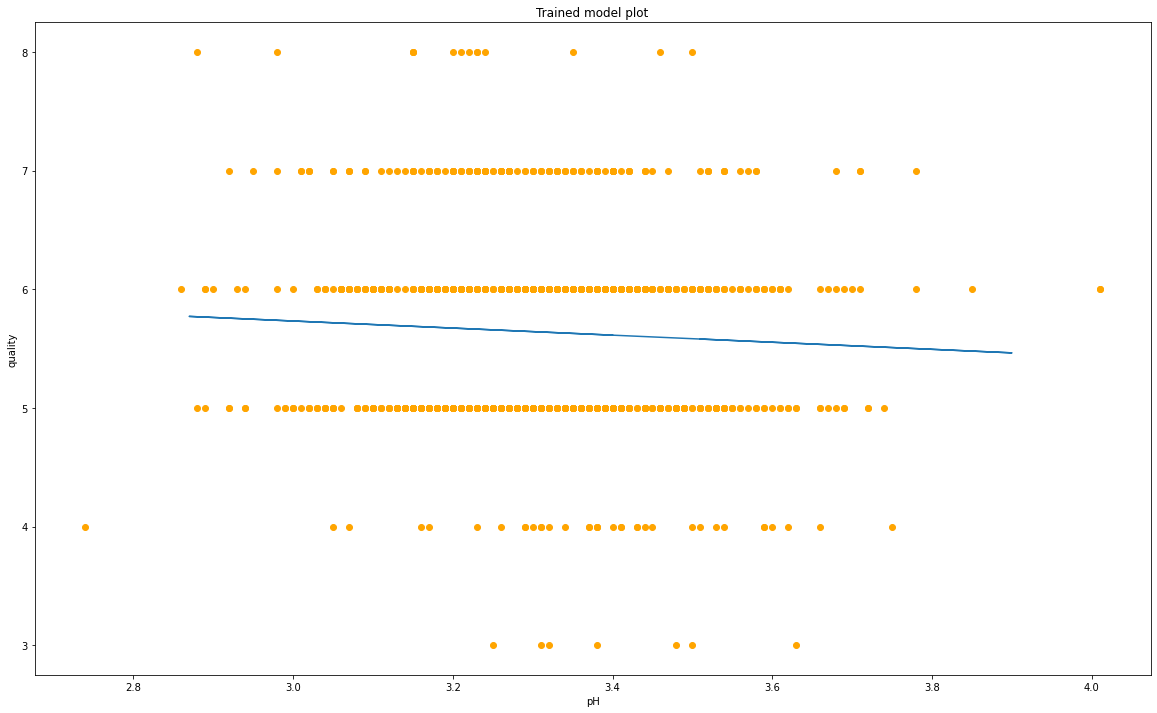

In [9]:
plt.rcParams["figure.figsize"]=[20,12]
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_test,y_predict)
plt.xlabel("pH")
plt.ylabel("quality")
plt.title("Trained model plot")
plt.plot

pH가 증가하면 와인 품질이 감소함.

최고급 와인의 ph는 약 3.2.

5에서 7 사이의 품질을 가진 대부분의 와인은 3에서 3.6 사이의 ph 범위를 갖음


In [10]:
import pandas as pd

red_wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
display(red_wine.head(5))
red_wine.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Quality로 분류 예측하는 것이 목표.
퀄리티의 기준은 7로 분류.

In [11]:
def binary_quality(x):
    target = None
    if x >= 7:
        target = 1
    else:
        target = 0
    return target

red_wine['target'] = red_wine['quality'].apply(lambda x : binary_quality(x))
print(red_wine['target'].value_counts())

0    1382
1     217
Name: target, dtype: int64


7 이상인 와인이 217, 미만인 와인이 1382인 모습

In [12]:
wine_y = red_wine['target']
#필요없는 데이터 값들 제거
wine_X = red_wine.drop(['target', 'quality'], axis = 1)
display(wine_X.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
from sklearn.model_selection import train_test_split

#test set을 20%, trainnig set을 80%로 설정
x_train, x_test, y_train, y_test = train_test_split(wine_X, wine_y,
                                                    test_size = 0.2,
                                                    stratify=wine_y,
                                                    random_state = 1)

In [14]:
#데이터 전처리
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

print(x_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
557            15.6             0.645         0.49             4.2      0.095   
173             7.4             0.620         0.05             1.9      0.068   
974             8.8             0.330         0.41             5.9      0.073   
247             8.2             0.600         0.17             2.3      0.072   
367            10.4             0.575         0.61             2.6      0.076   
...             ...               ...          ...             ...        ...   
954             7.6             0.430         0.40             2.7      0.082   
634             7.9             0.350         0.21             1.9      0.073   
1259            6.8             0.640         0.00             2.7      0.123   
760             9.0             0.580         0.25             2.8      0.075   
421             6.6             0.840         0.03             2.3      0.059   

      free sulfur dioxide  

In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

rfc = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lrg = LogisticRegression(solver='liblinear', random_state=1)

rfc_cv_scores = cross_val_score(rfc, x_train , y_train , cv=5)
xgb_cv_scores = cross_val_score(xgb, x_train , y_train , cv=5)
lrg_cv_scores = cross_val_score(lrg, x_train , y_train , cv=5)

print("random forest 평균 정확도: ", round(np.mean(rfc_cv_scores), 4))
print("XGBoost 평균 정확도: ", round(np.mean(xgb_cv_scores), 4))
print("LogisticRegression 평균 정확도: ", round(np.mean(lrg_cv_scores), 4))

random forest 평균 정확도:  0.9093
XGBoost 평균 정확도:  0.9015
LogisticRegression 평균 정확도:  0.8772


In [16]:
from sklearn.metrics import accuracy_score

rfc.fit(x_train , y_train)
pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(" test 데이터에서의 RandomForestClassifier 정확도:", round(accuracy,4))

 test 데이터에서의 RandomForestClassifier 정확도: 0.8656


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(units= 64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 32, activation='relu'),
    tf.keras.layers.Dense(units= 2 , activation = None),
    tf.keras.layers.Softmax()
    #마지막 계층
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
softmax (Softmax)            (None, 2)                 0         
Total params: 2,914
Trainable params: 2,914
Non-trainable params: 0
_________________________________________________________________


2023-01-10 12:43:11.441198: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = loss_fn, metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size = 4)
model.evaluate(x_test, y_test, verbose=2)

2023-01-10 12:43:11.620948: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
320/320 [==============================] - 1s 1ms/step - loss: 1.0347 - accuracy: 0.7733
Epoch 2/30
320/320 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.8092
Epoch 3/30
320/320 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.8342
Epoch 4/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.8468
Epoch 5/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8530
Epoch 6/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8569
Epoch 7/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8554
Epoch 8/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8530
Epoch 9/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8600
Epoch 10/30
320/320 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8640

[0.39325904846191406, 0.8656250238418579]